### EDA

Importo las librerías necesarias para realizar el EDA.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Cargo el archivo "output_steam_games_ETL.parquet" para realizar el EDA, ya que es el que usaré para realizar el proceso de machine learning.

In [4]:
df = pd.read_parquet("output_steam_games_ETL.parquet")

Observo los datos.

In [5]:
df

,app_name,release_date,price,id,developer,illustration,modeling,accounting,action,adventure,...,steam achievements,steam cloud,steam leaderboards,steam trading cards,steam turn notifications,steam workshop,steamvr collectibles,tracked motion controllers,valve anti-cheat enabled,windows mixed reality
0,Lost Summoner Kitty,2018-01-04,4.99,761140,Kotoshiro,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Ironbound,2018-01-04,0.00,643980,Secret Level SRL,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,Real Pool 3D - Poolians,2017-07-24,0.00,670290,Poolians.com,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,弹炸人2222,2017-12-07,0.99,767400,彼岸领域,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Log Challenge,None,2.99,773570,None,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32130,Colony On Mars,2018-01-04,1.99,773640,"Nikita ""Ghost_RUS""",0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32131,LOGistICAL: South Africa,2018-01-04,4.99,733530,Sacada,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
32132,Russian Roads,2018-01-04,1.99,610660,Laush Dmitriy Sergeevich,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
32133,EXIT 2 - Directions,2017-09-02,4.99,658870,"xropi,stev3ns",0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


Cuento si hay nulos.

In [6]:
df.isna().sum()

app_name                         2
release_date                  2067
price                            0
id                               2
developer                     3299
                              ... 
steam workshop                   0
steamvr collectibles             0
tracked motion controllers       0
valve anti-cheat enabled         0
windows mixed reality            0
Length: 386, dtype: int64

Elimino los nulos de id ya que son los necesarios para acceder al sistema de recomendación futuro.

In [8]:
df["id"].dropna(inplace=True)

Observo la distribución de los precios.

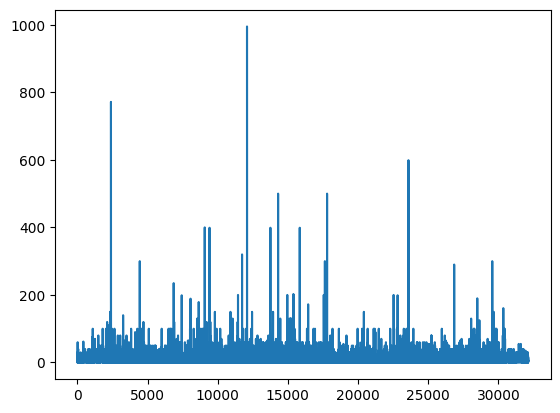

In [10]:
plt.plot(df["price"])

plt.show()

Se puede observar que existen algunos juegos que cuestan más de 200 dolares, al ser muy pocos, no tocarlos es lo correcto, así que prosigo a observar su media.

In [12]:
df["price"].mean()

8.486905865878326

Se observa que los valores atípicos no afectan mucho a la media de los precios. Por lo que la opción de dejarlos se mantiene. Pero, por si acaso, revisaré su desviación estandar.

In [13]:
df["price"].std()

15.662265112521727

Parecería una desviación estandar alta, pero al haber tantos juegos y de precios tan variados, se puede mantener la incertidumbre.

Ahora prosigo a observar la columna de los desarrolladores.

c:\Users\fabian\Documents\Soy Henry\Proyecto 1-3\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24444 (\N{CJK UNIFIED IDEOGRAPH-5F7C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\fabian\Documents\Soy Henry\Proyecto 1-3\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23736 (\N{CJK UNIFIED IDEOGRAPH-5CB8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\fabian\Documents\Soy Henry\Proyecto 1-3\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39046 (\N{CJK UNIFIED IDEOGRAPH-9886}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\fabian\Documents\Soy Henry\Proyecto 1-3\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22495 (\N{CJK UNIFIED IDEOGRAPH-57DF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\fabian\Documents\Soy Henry\Proyecto 1-3

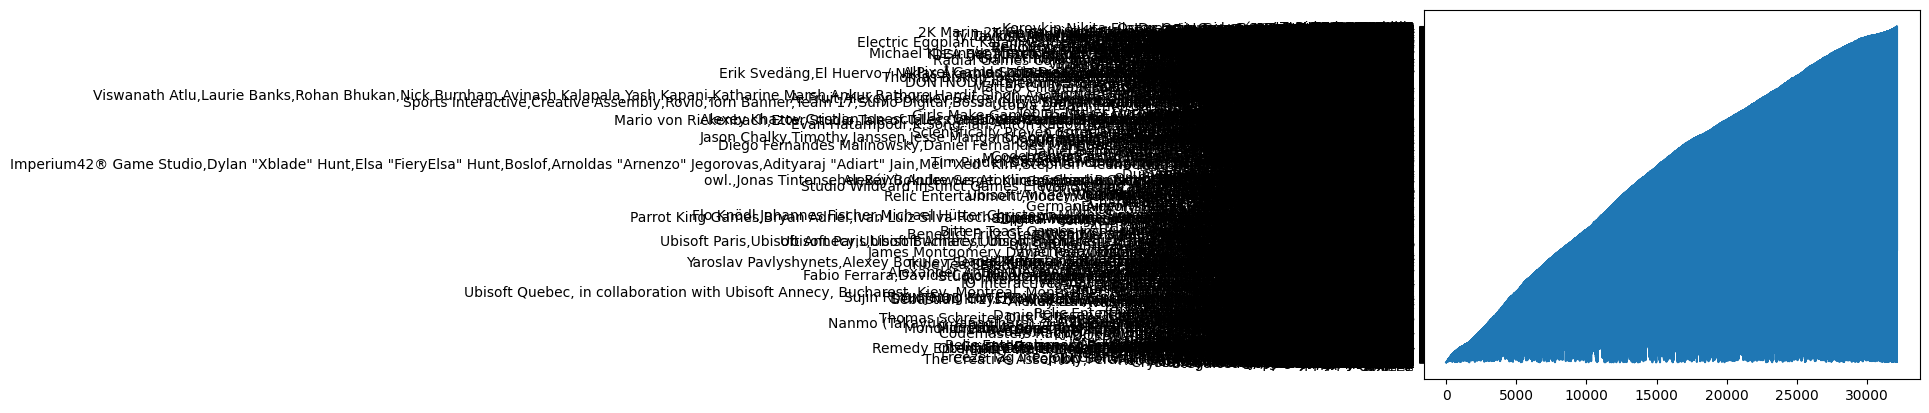

In [16]:
# Elimino los valores faltantes de los desarrolladores para observar claramente
# a los demás.

desarrolladores = df["developer"].dropna()
plt.plot(desarrolladores)

plt.show()

Quizá no haya sido la mejor idea, hay demasiados desarrolladores.

Bueno, con esto concluye el EDA. No había mucho que investigar, ya que se podría decir que en el ETL se hizo todo el preparado de los datos y, la cantidad de columnas que se tiene es debido al proceso de "get_dummies".